In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("HR_comma_sep.csv")
# df = pd.DataFrame(data)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [74]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

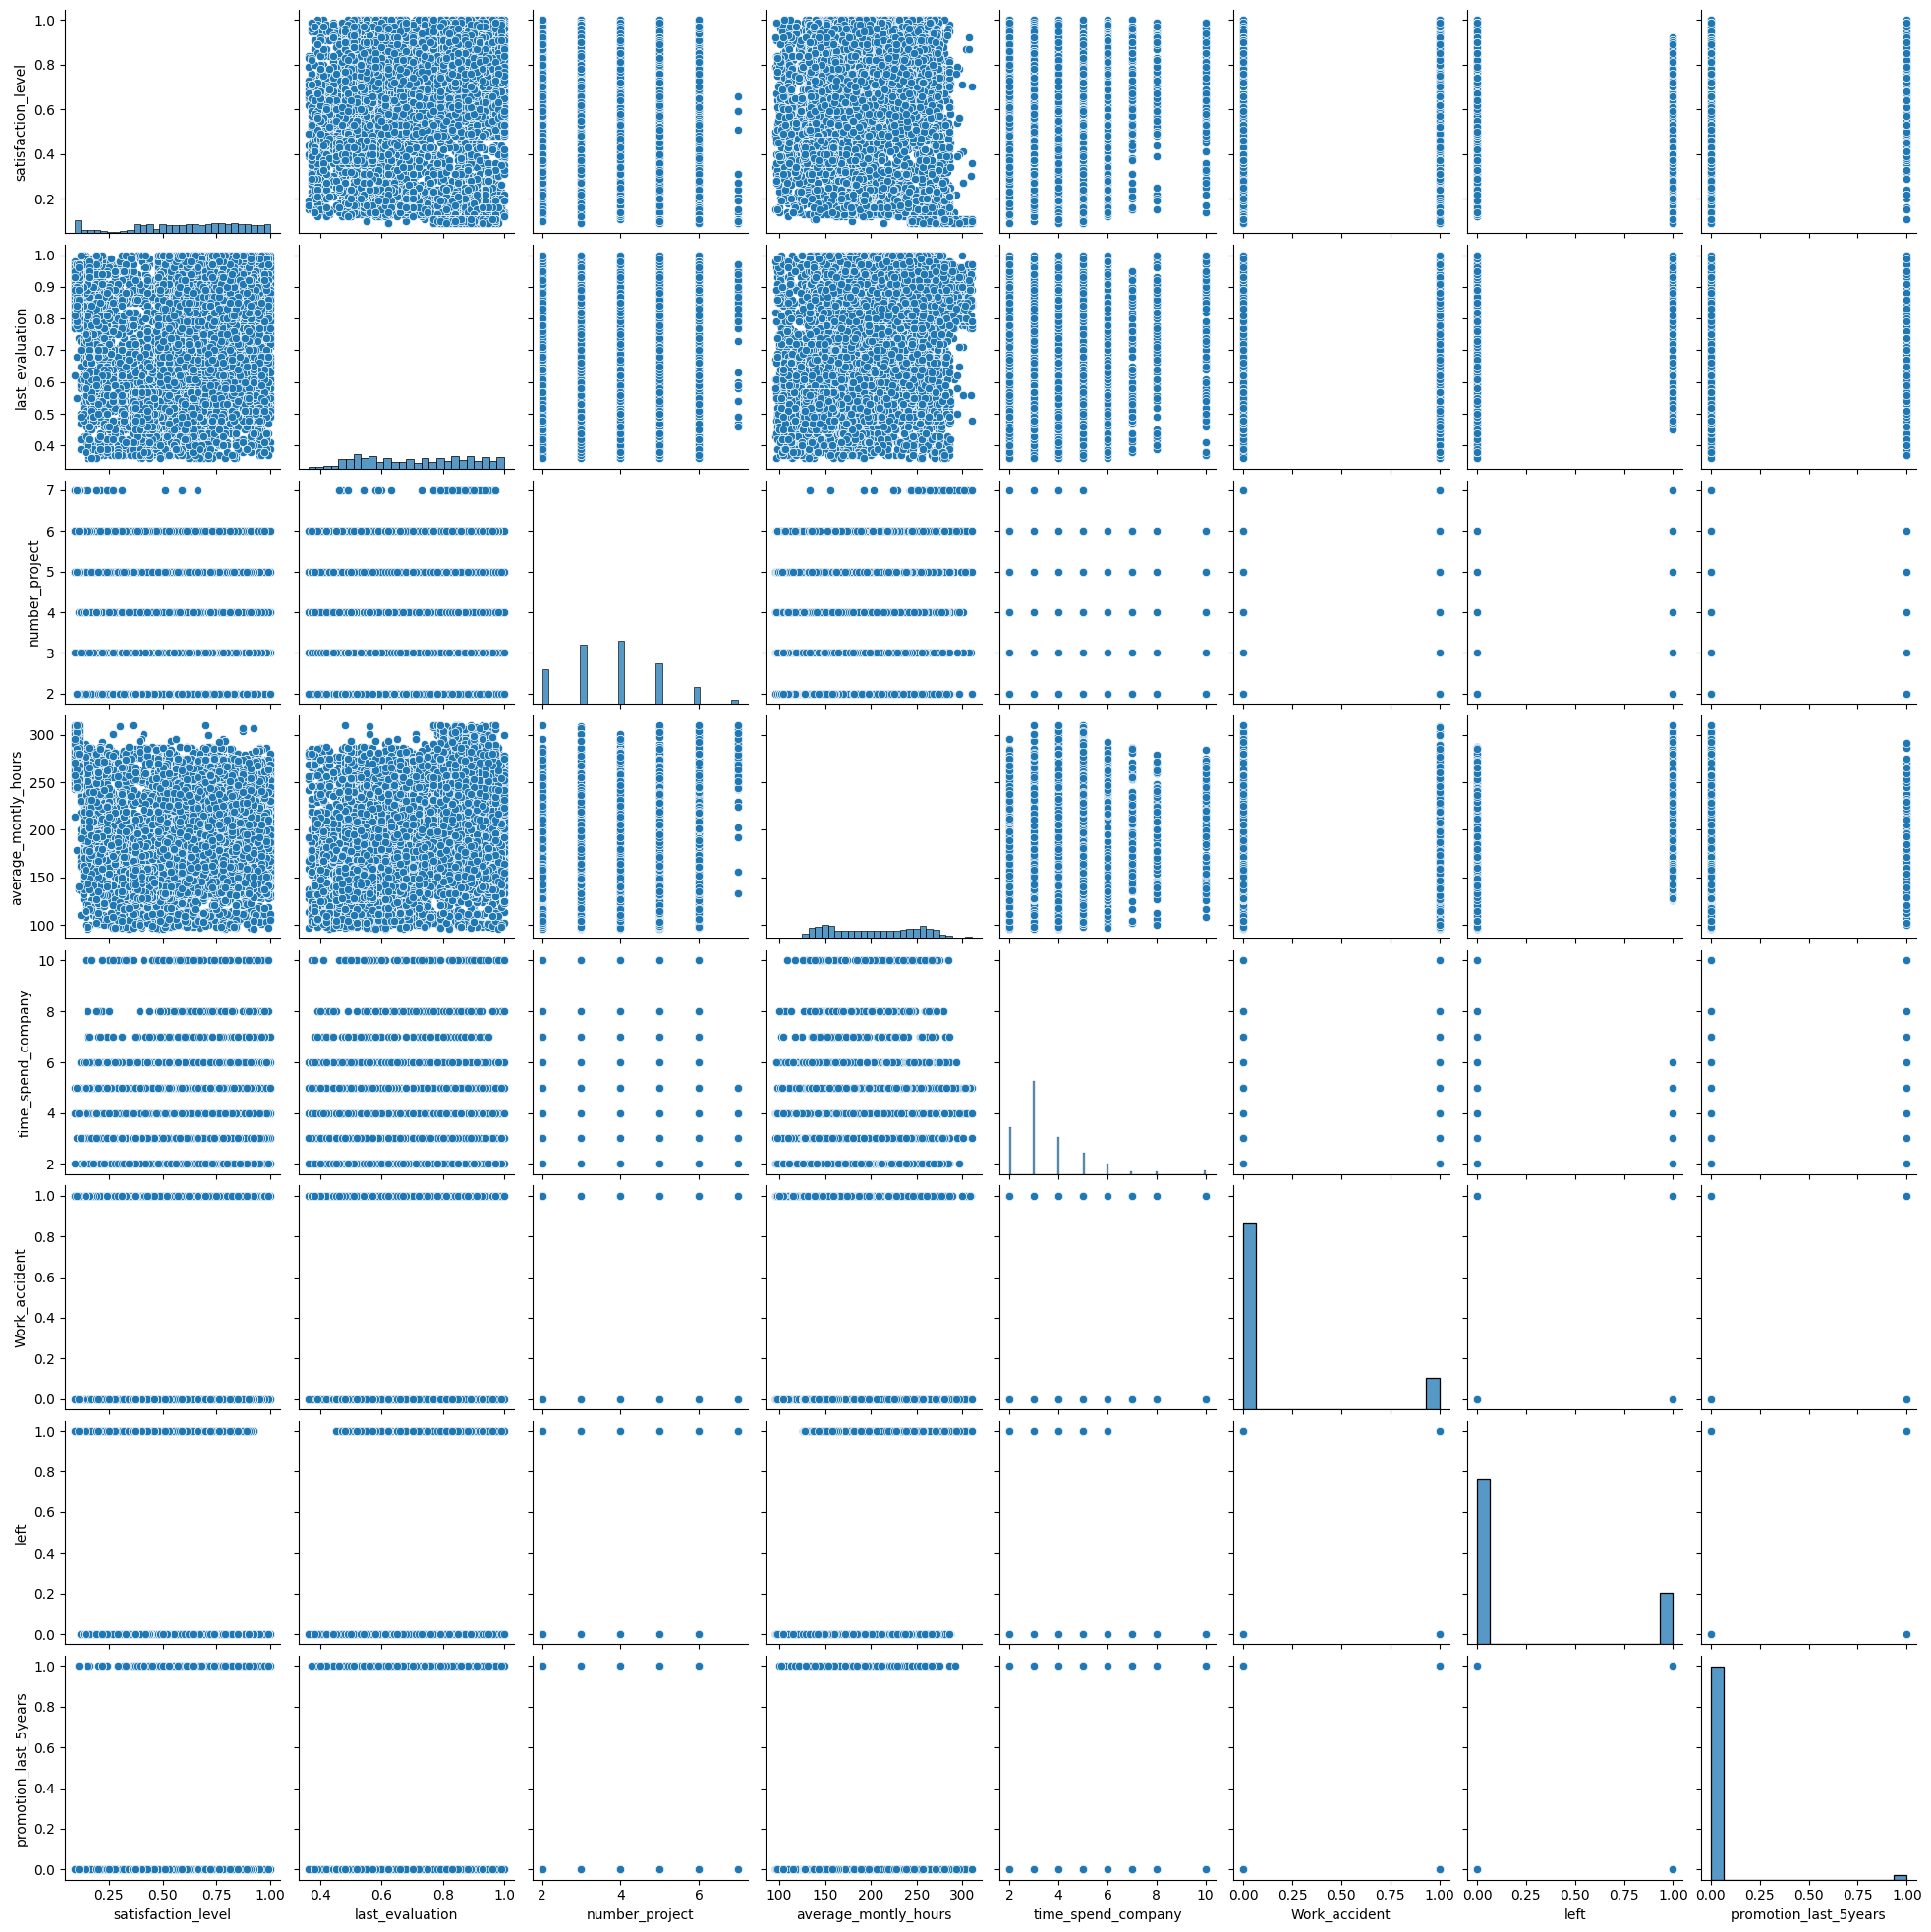

In [3]:
pp = sns.pairplot(df)
pp.savefig('hr_seaborn.png')

In [75]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [76]:
(df.left == 1).sum()/((df.left == 0).sum() + (df.left == 1).sum())

0.2380825388359224

In [77]:
df.promotion_last_5years.value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [78]:
d = {df.promotion_last_5years.name: df['promotion_last_5years'].corr(df['left']), df.satisfaction_level.name: df['satisfaction_level'].corr(df['left']), df.time_spend_company.name: df['time_spend_company'].corr(df['left']), df.last_evaluation.name: df['last_evaluation'].corr(df['left']), df.number_project.name: df['number_project'].corr(df['left']), df.average_montly_hours.name: df.average_montly_hours.corr(df.left), df.Work_accident.name: df.Work_accident.corr(df.left) }
d

{'promotion_last_5years': -0.06178810657920103,
 'satisfaction_level': -0.38837498342411436,
 'time_spend_company': 0.14482217493938593,
 'last_evaluation': 0.006567120447534082,
 'number_project': 0.023787185071774235,
 'average_montly_hours': 0.07128717878330129,
 'Work_accident': -0.1546216337051352}

In [25]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


<Axes: xlabel='Department', ylabel='Count'>

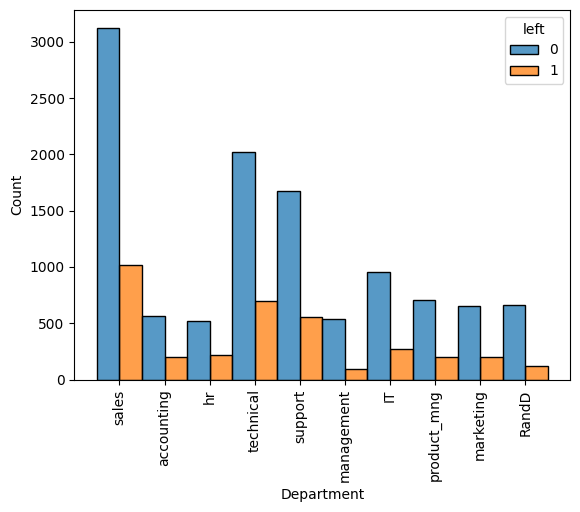

In [79]:
plt.xticks(rotation=90)
sns.histplot(data=df, x=df['Department'], hue=df['left'], discrete=True, multiple="dodge")


<Axes: xlabel='salary', ylabel='Count'>

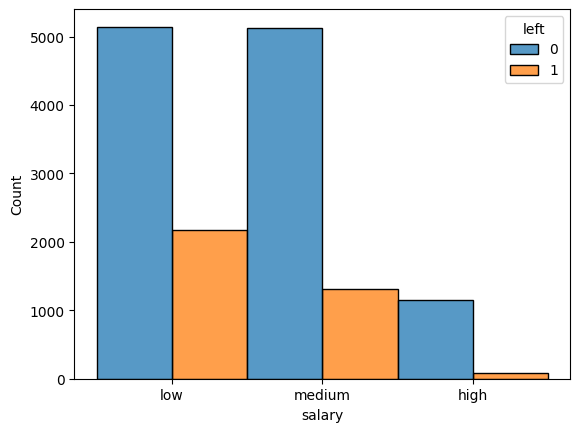

In [80]:
sns.histplot(data=df, x=df['salary'], hue=df['left'], discrete=True, multiple="dodge")

In [95]:
g = df.groupby('left',)

In [91]:
type(g)

pandas.core.groupby.generic.DataFrameGroupBy

In [138]:
print(type(df.groupby("left")['average_montly_hours'].agg('mean')))
means = []
for col in df.columns:
    if df[col].dtype == np.object_:
        print(col, ' - not a number')
    else:
        means.append(df.groupby("left")[col].agg('mean'))


<class 'pandas.core.series.Series'>
Department  - not a number
salary  - not a number


In [139]:
print(means)

[left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64, left
0    0.715473
1    0.718113
Name: last_evaluation, dtype: float64, left
0    3.786664
1    3.855503
Name: number_project, dtype: float64, left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64, left
0    3.380032
1    3.876505
Name: time_spend_company, dtype: float64, left
0    0.175009
1    0.047326
Name: Work_accident, dtype: float64, left
0    0.0
1    1.0
Name: left, dtype: float64, left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64]


In [188]:
# Based on above diagrams, means and correlation, following are the fields chosen to predict on:
#  salary, satisfaction_level, time_spend_company, average_montly_hours

prediction_fields = ['salary', 'satisfaction_level', 'time_spend_company', 'average_montly_hours']
dummies = pd.get_dummies(df['salary'], dtype=int)
dummies



,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [189]:
df_dummies = pd.concat([df[prediction_fields], dummies,], axis='columns')
df_dummies

,salary,satisfaction_level,time_spend_company,average_montly_hours,high,low,medium
0,low,0.38,3,157,0,1,0
1,medium,0.80,6,262,0,0,1
2,medium,0.11,4,272,0,0,1
3,low,0.72,5,223,0,1,0
4,low,0.37,3,159,0,1,0
...,...,...,...,...,...,...,...
14994,low,0.40,3,151,0,1,0
14995,low,0.37,3,160,0,1,0
14996,low,0.37,3,143,0,1,0
14997,low,0.11,4,280,0,1,0


In [190]:
df_dummies = df_dummies.drop(['salary', 'medium'], axis='columns')

In [191]:
df_dummies

,satisfaction_level,time_spend_company,average_montly_hours,high,low
0,0.38,3,157,0,1
1,0.80,6,262,0,0
2,0.11,4,272,0,0
3,0.72,5,223,0,1
4,0.37,3,159,0,1
...,...,...,...,...,...
14994,0.40,3,151,0,1
14995,0.37,3,160,0,1
14996,0.37,3,143,0,1
14997,0.11,4,280,0,1


In [200]:
# Create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies, df['left'], test_size=0.3)

In [201]:
# import classification model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [202]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [203]:
model.score(X_test, y_test)

0.7835555555555556